# **Customer Churn Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Checking for
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Checking NULL Values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.shape

(7043, 21)

In [10]:
#Drop NULL Values
df.dropna(inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
#Checking for Duplicates
df.duplicated().sum()

0

# **Data Manipulation:**

In [13]:
# Task 1. Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:, 4]
print("Customer 5th column:\n", customer_5.head())

Customer 5th column:
 0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object


In [14]:
# Task 2. Extract the 15th column and store it in ‘customer_15’
customer_15 = df.iloc[:, 14]
print("Customer 15th column:\n", customer_15.head())

Customer 15th column:
 0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object


In [15]:
# Task 3. Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic = df[(df['gender']=='Male')&(df['SeniorCitizen']==1)&(df['PaymentMethod']== 'Electronic check')]
print("Senior Male Electronic:\n",senior_male_electronic.head())

Senior Male Electronic:
     customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
20  8779-QRDMV   Male              1      No         No       1           No   
55  1658-BYGOY   Male              1      No         No      18          Yes   
57  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
78  0191-ZHSKZ   Male              1      No         No      30          Yes   
91  2424-WVHPL   Male              1      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
20  No phone service             DSL             No  ...              Yes   
55               Yes     Fiber optic             No  ...               No   
57               Yes     Fiber optic             No  ...              Yes   
78                No             DSL            Yes  ...               No   
91                No     Fiber optic             No  ...               No   

   TechSupport StreamingTV Stre

In [16]:
# Task 4. Extract all those customers whose tenure is greater than 70 months
# or their monthly charges is more than 100 and store the result in ‘customer_total_tenure’
customer_total_tenure = df[(df['tenure']> 70)| (df['MonthlyCharges']>100)]
print("Customer Total Tenure:\n", customer_total_tenure.head())


Customer Total Tenure:
     customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
8   7892-POOKP  Female              0     Yes         No      28          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
8            Yes     Fiber optic             No  ...              Yes   
12           Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   
14            No     Fiber optic            Yes  ...              Yes   
15           Yes     Fiber optic            Yes  ...              Yes   

   TechSupport StreamingTV StreamingMovies        

In [17]:
#Task 5: Extract all the customers whose contract is of two years, payment method is mailed check
# and the value of churn is ‘Yes’ and store the result in 'two_mail_yes'
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
print("Two year contract, mailed check, churn yes:\n", two_mail_yes.head())

Two year contract, mailed check, churn yes:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No i

In [18]:
# Task 6. Extract 333 random records from the customer_churn dataframe and store the result in ‘customer_333’
customer_333 = df.sample(n=333, random_state=42)
print("Random 333 customers:\n", customer_333)


Random 333 customers:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2481  6614-YWYSC    Male              1     Yes         No      61   
6784  9546-KDTRB  Female              0      No         No      19   
6125  0871-URUWO    Male              0     Yes         No      13   
3052  5151-HQRDG    Male              0     Yes         No      37   
4099  6624-JDRDS  Female              0      No         No       6   
...          ...     ...            ...     ...        ...     ...   
586   4568-KNYWR    Male              0      No         No      52   
5681  2522-WLNSF  Female              1     Yes         No      34   
830   9101-BWFSS  Female              0     Yes         No      50   
2143  4079-VTGLK    Male              1     Yes         No      30   
6765  5115-SQAAU  Female              0     Yes        Yes      69   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
2481          Yes               Yes              No  No

In [19]:
# Task 7. Get the count of different levels from the ‘Churn’ column
churn_counts = df['Churn'].value_counts()
print("Churn counts:\n", churn_counts)

Churn counts:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64


# **Data Visualization**

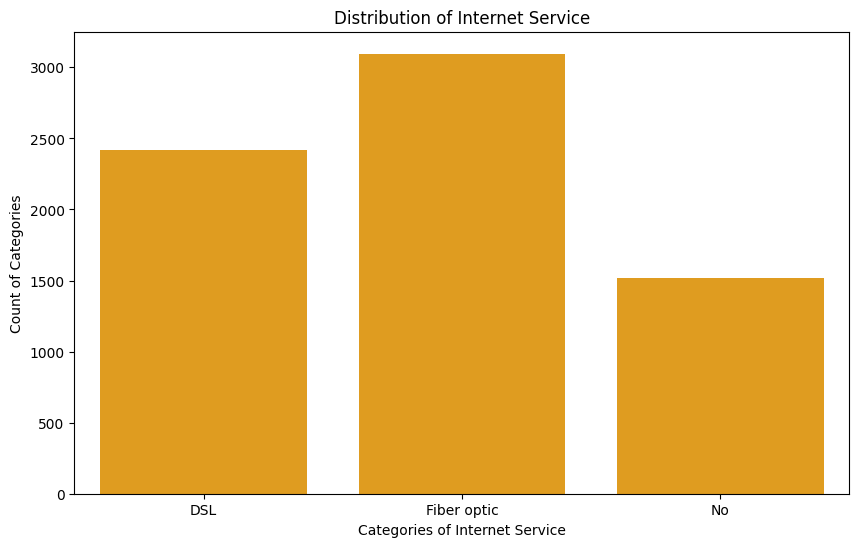

In [20]:
#● Build a bar-plot for the ’InternetService’ column:
 #a. Set x-axis label to ‘Categories of Internet Service’
 #b. Set y-axis label to ‘Count of Categories’
 #. Set the title of plot to be ‘Distribution of Internet Service’
 #d. Set the color of the bars to be ‘orange’

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='InternetService',color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

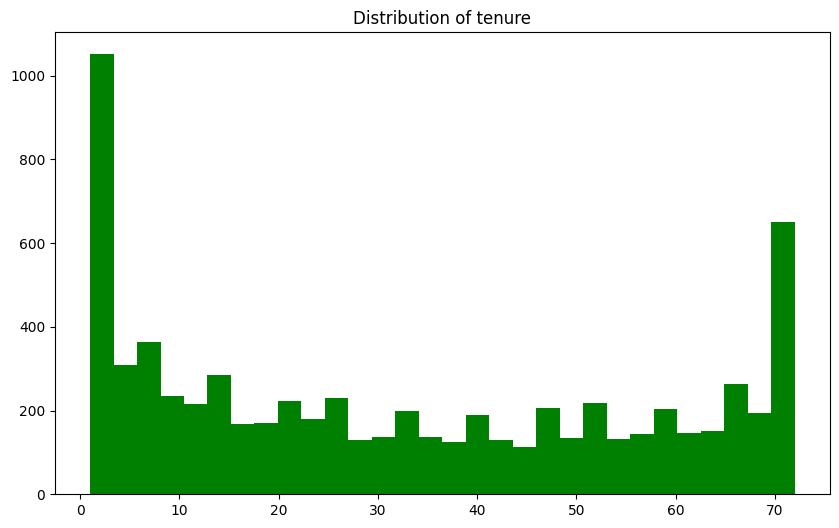

In [21]:
#Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title ‘Distribution of tenure’

plt.figure(figsize=(10,6))
plt.hist(df['tenure'],bins=30,color='green')
plt.title('Distribution of tenure')
plt.show()

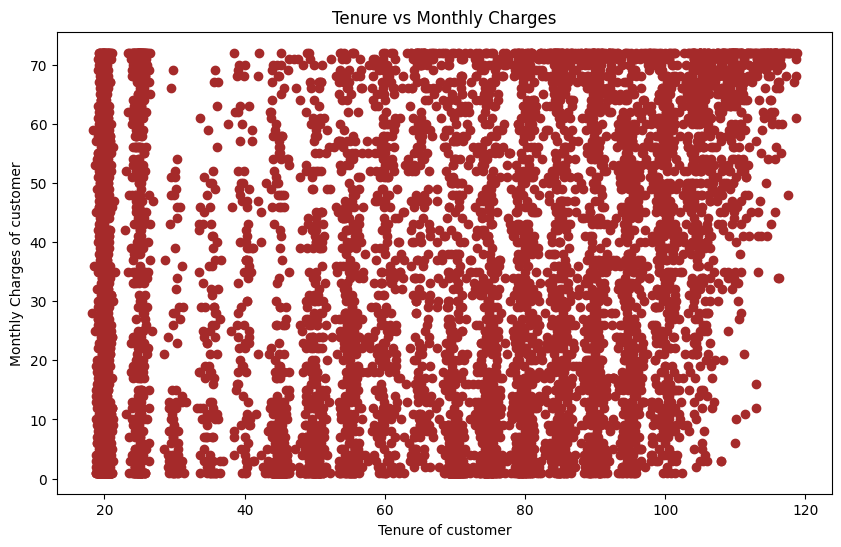

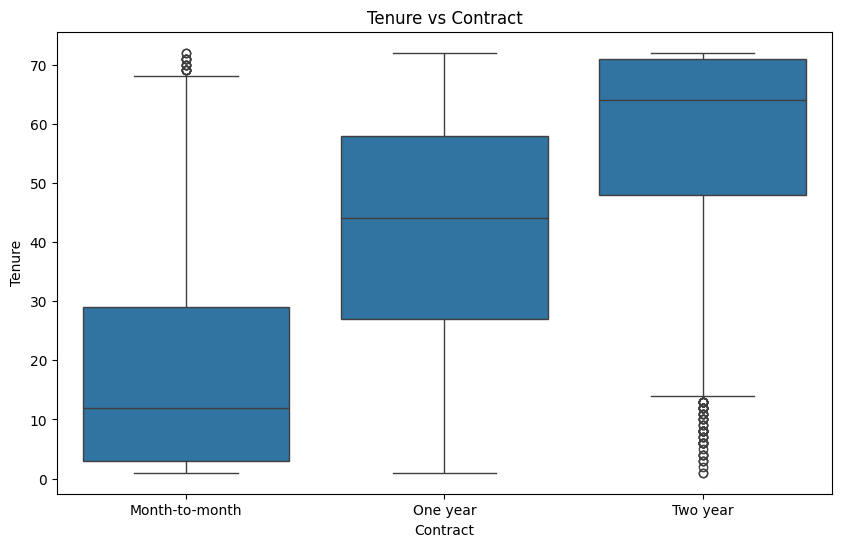

In [22]:
#Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
 #‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
 #a. Assign the points a color of ‘brown’
 #b. Set the x-axis label to ‘Tenure of customer’
 #c. Set the y-axis label to ‘Monthly Charges of customer’
 #d. Set the title to ‘Tenure vs Monthly Charges’
 #e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
 #y-axis &
 #f. ‘Contract’ on the x-axis.

plt.figure(figsize=(10,6))
plt.scatter(df['MonthlyCharges'],df['tenure'],color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.show()

# **Linear Regression**

In [23]:
#Linear Regression:
 #● Build a simple linear model where dependent variable is ‘MonthlyCharges’
 #and independent variable is ‘tenure’:
 #a. Divide the dataset into train and test sets in 70:30 ratio.
 #b. Build the model on train set and predict the values on test set
 #c. After predicting the values, find the root mean square error
 #d. Find out the error in prediction & store the result in ‘error’
 #e. Find the root mean square error

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
# Prepare the data
X = df[['tenure']]
y = df['MonthlyCharges']

In [26]:
# Split the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Build the model on train set
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [28]:
# Predict the values on test set
y_pred = linear_model.predict(X_test)

In [29]:
# Calculate the root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

# Find the error in prediction
error = y_test - y_pred

# Find the root mean square error
print(f"Root Mean Square Error: {rmse}")

Root Mean Square Error: 28.970721349228278


# **Logistic Regression**

In [30]:
#Logistic Regression:
 #● Build a simple logistic regression model where dependent variable is
 #‘Churn’ and independent variable is ‘MonthlyCharges’:
 #a. Divide the dataset in 65:35 ratio
 #b. Build the model on train set and predict the values on test set
 #c. Build the confusion matrix and get the accuracy score

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
# Prepare the data
X = df[['MonthlyCharges']]
y = df['Churn']

In [33]:
# Split the data into train and test sets in 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [34]:
# Build the model on train set
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Predict the values on test set
y_pred = logistic_model.predict(X_test)

In [36]:
# Build the confusion matrix and get the accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy Score: {accuracy}")

Confusion Matrix:
[[1824    0]
 [ 638    0]]
Accuracy Score: 0.7408610885458976


# Multiple logistic **regression**

In [37]:
# Multiple logistic regression
#d. Build a multiple logistic regression model where dependent variable is
 #‘Churn’ and independent variables are ‘tenure’ and
 #‘MonthlyCharges’
 #e. Divide the dataset in 80:20 ratio
 #f. Build the model on train set and predict the values on test set
 #g. Build the confusion matrix and get the accuracy score

In [38]:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

In [39]:
# Split the data into train and test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Build the model on train set
multiple_logistic_model = LogisticRegression()
multiple_logistic_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predict the values on test set
y_pred = multiple_logistic_model.predict(X_test)

In [42]:
# Build the confusion matrix and get the accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [43]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy Score: {accuracy}")

Confusion Matrix:
[[938  95]
 [215 159]]
Accuracy Score: 0.7796730632551528


# **Decision Tree**

In [44]:
 #Decision Tree:
 #● Build a decision tree model where dependent variable is ‘Churn’ and
 #independent variable is ‘tenure’:
 #a. Divide the dataset in 80:20 ratio
 #b. Build the model on train set and predict the values on test set
 #c. Build the confusion matrix and calculate the accuracy

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score

In [46]:
# Data Preparation
X = ['tenure']
y = ['Churn']

In [48]:
# Build the model on train set
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Predict the values on test set
y_pred = decision_tree_model.predict(X_test)

In [50]:
# Build the confusion matrix and calculate the accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuraccy = accuracy_score(y_test, y_pred)

In [51]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuraccy Score:\n{accuraccy}")

Confusion Matrix:
[[861 172]
 [196 178]]
Accuraccy Score:
0.738450604122246


# **Random Forest:**

In [52]:
#Random Forest:
 #● Build a Random Forest model where dependent variable is ‘Churn’ and
 #independent variables are ‘tenure’ and ‘MonthlyCharges’:
 #a. Divide the dataset in 70:30 ratio
 #b. Build the model on train set and predict the values on test set
 #c. Build the confusion matrix and calculate the accuracy

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
#Prepare the data
X = df[['tenure','MonthlyCharges']]
y = df['Churn']

In [67]:
# Split the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Build the model on train set
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Predict the values on test set
y_pred = random_forest_model.predict(X_test)

In [70]:
# Build the confusion matrix and calculate the accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy Score: {accuracy}")

Confusion Matrix:
[[1316  233]
 [ 317  244]]
Accuracy Score: 0.7393364928909952
